## DSC640-T302

## Assignment 1.2

## Lincoln Brown

## Professor Williams

In [7]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import pandas as pd
import seaborn as sns

In [8]:
# Import the data
hotdog_contest_df = pd.read_excel("./ex1-2/hotdog-contest-winners.xlsm")

In [9]:
hotdog_contest_df.head()

,Year,Winner,Dogs eaten,Country,New record
0,1980,Paul Siederman,9.1,United States,0
1,1980,Joe Baldini,9.1,United States,0
2,1981,Thomas DeBerry,11.0,United States,0
3,1982,Steven Abrams,11.0,United States,0
4,1983,Luis Llamas,19.5,Mexico,0


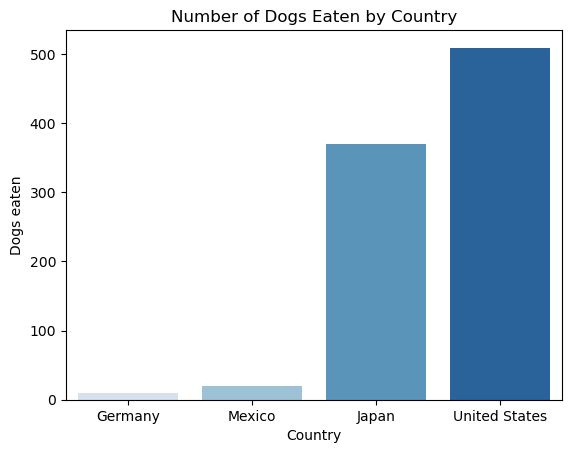

In [10]:
# Bar chart of number of dogs eaten by country
country_data = hotdog_contest_df.groupby('Country')['Dogs eaten'].sum().sort_values().reset_index()
sns.barplot(x='Country', y='Dogs eaten', data=country_data, hue='Country', palette='Blues', legend=False)
plt.title('Number of Dogs Eaten by Country')
plt.show()

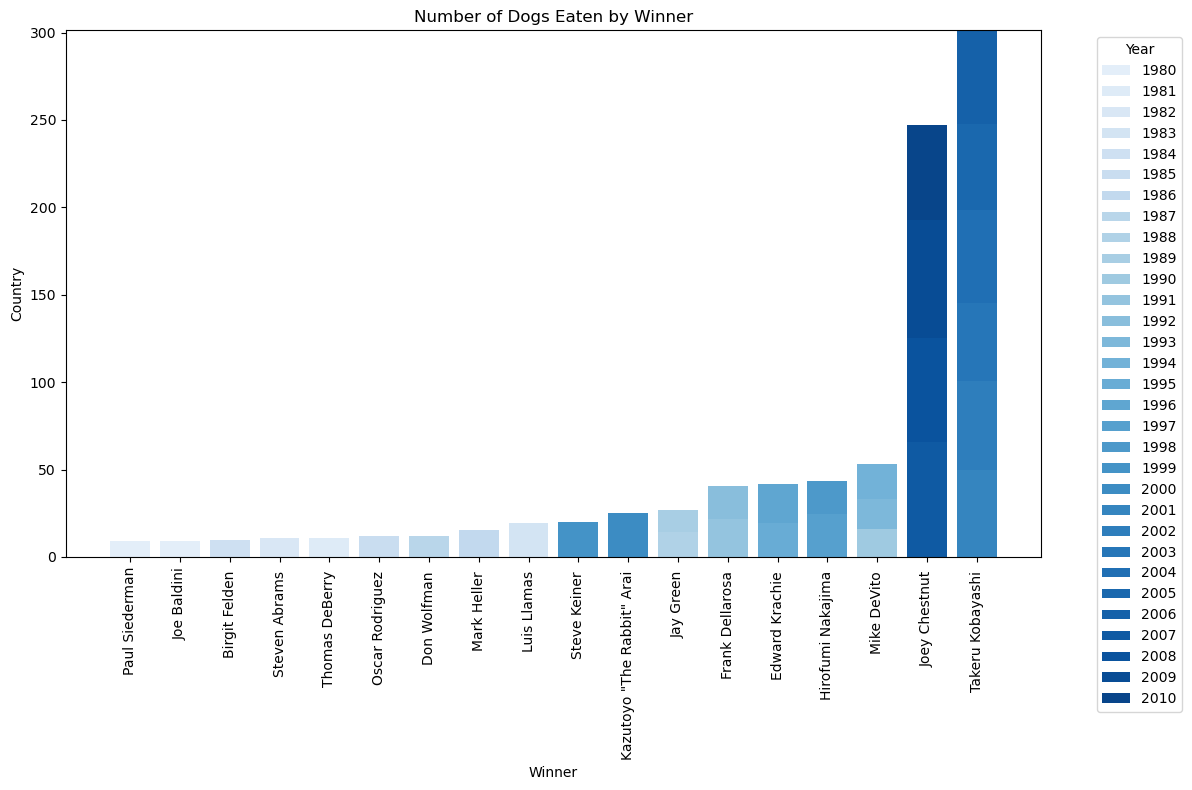

In [13]:
# Stacked bar chart of number of dogs eaten by winner

# Create a pivot table to get the sum of dogs eaten by each winner
winner_pivot = hotdog_contest_df.pivot_table(values='Dogs eaten', index='Winner', columns='Year', aggfunc='sum', fill_value=0)

# Create a total column to sort
winner_pivot['Total'] = winner_pivot.sum(axis=1)
winner_pivot.sort_values('Total', inplace=True)

# Drop the total column so that it is not displayed in the graph
winner_pivot.drop(columns='Total', inplace=True)

# Get a subset of colors for each year
colors = cm.Blues(range(256))[25:] # Skip the columns that are nearly white to make the graph more legible
color_subset = colors[::len(colors)//len(winner_pivot.columns)]

# Plot the stacked bar graph
fig, ax = plt.subplots(figsize=(12, 8))

bottom = None
for i,year in enumerate(winner_pivot.columns):
    if bottom is None:
        ax.bar(winner_pivot.index, winner_pivot[year], label=year, color=color_subset[i])
        bottom = winner_pivot[year]
    else:
        ax.bar(winner_pivot.index, winner_pivot[year], bottom=bottom, label=year, color=color_subset[i])
        bottom += winner_pivot[year]

plt.title('Number of Dogs Eaten by Winner')
plt.xlabel('Winner')
plt.ylabel('Country')
plt.xticks(rotation=90)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

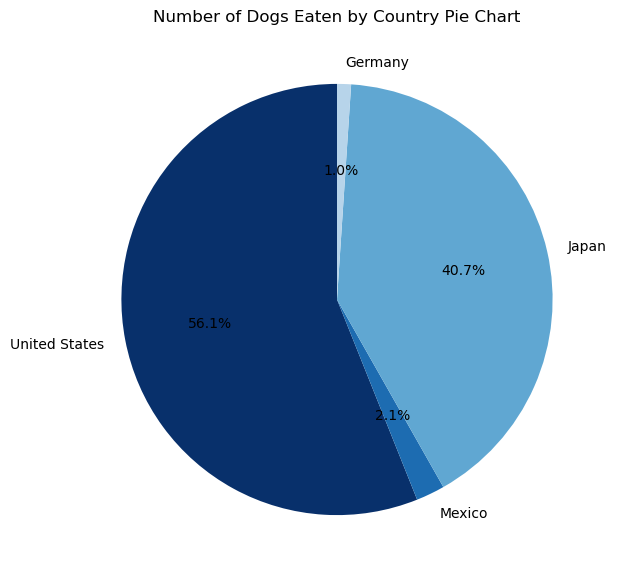

In [15]:
# Create a pie chart of number of dogs eaten by each country

# Reorder the data so that all of the slices are legible
country_reordered = country_data.copy()
country_reordered = country_reordered.reindex([3,1,2,0])

# Create the colors
n_colors = len(country_reordered)
color_indices = np.linspace(1, 0.3, n_colors)
colors = cm.Blues(color_indices)

# Plot the pie chart
fig, ax = plt.subplots(figsize=(10,7))
ax.pie(country_reordered['Dogs eaten'], labels=country_reordered['Country'], autopct='%1.1f%%', startangle=90, colors=colors)

plt.title('Number of Dogs Eaten by Country Pie Chart')
plt.show()

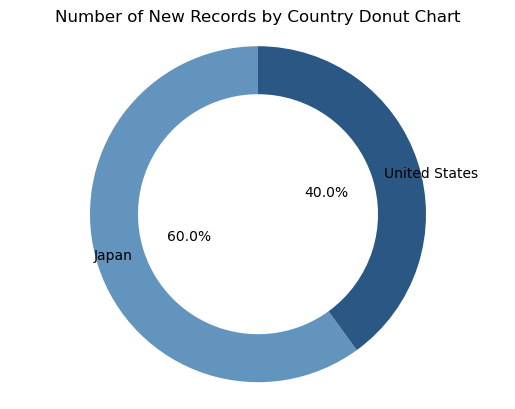

In [16]:
# Create a donut chart of the number of new records by country
# Group the data by Country and then get the number of new records for each country
new_records_country = hotdog_contest_df.groupby('Country')['New record'].sum()
# Filter out any countries that did not win any new records
filtered_countries = new_records_country[new_records_country != 0]

# Create the colors
colors = ['#6394BE', '#2A5783']

# Plot the donut chart
fig, ax = plt.subplots()
ax.pie(filtered_countries, labels=filtered_countries.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=-.4), colors=colors)

# Create the center circle
center_circle = plt.Circle((0,0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)

# Set axis to equal
ax.axis('equal')
plt.title('Number of New Records by Country Donut Chart')
plt.show()

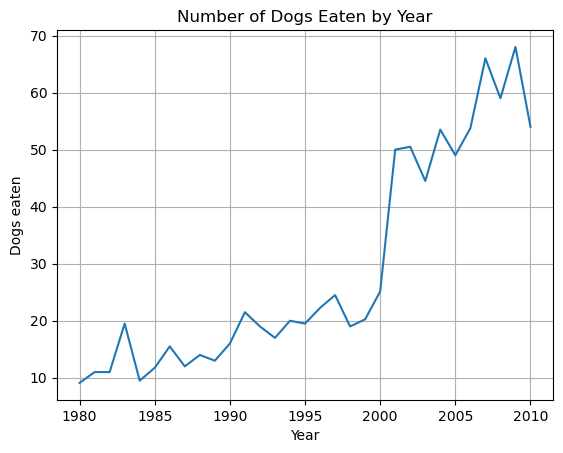

In [17]:
# Create a line chart of Number of Dogs eaten by Year

sns.lineplot(x = 'Year', y='Dogs eaten', data=hotdog_contest_df)
plt.title("Number of Dogs Eaten by Year")
plt.grid()
plt.show()